In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
def path(n_file):
    n_file_str = str(n_file).zfill(3)
    file_path = str(r"C:\Users\rjnar\Documents\NIP\BS-Thesis\III - EEG Analysis\F\F" + n_file_str + '.txt')
    return file_path

def extract(file_path):
    with open(file_path, 'r') as file:
        data = [ int(line.strip()) for line in file]
    return data

data = []
for i in range (1,101):
    name = path(i)
    data.append( extract(name) )

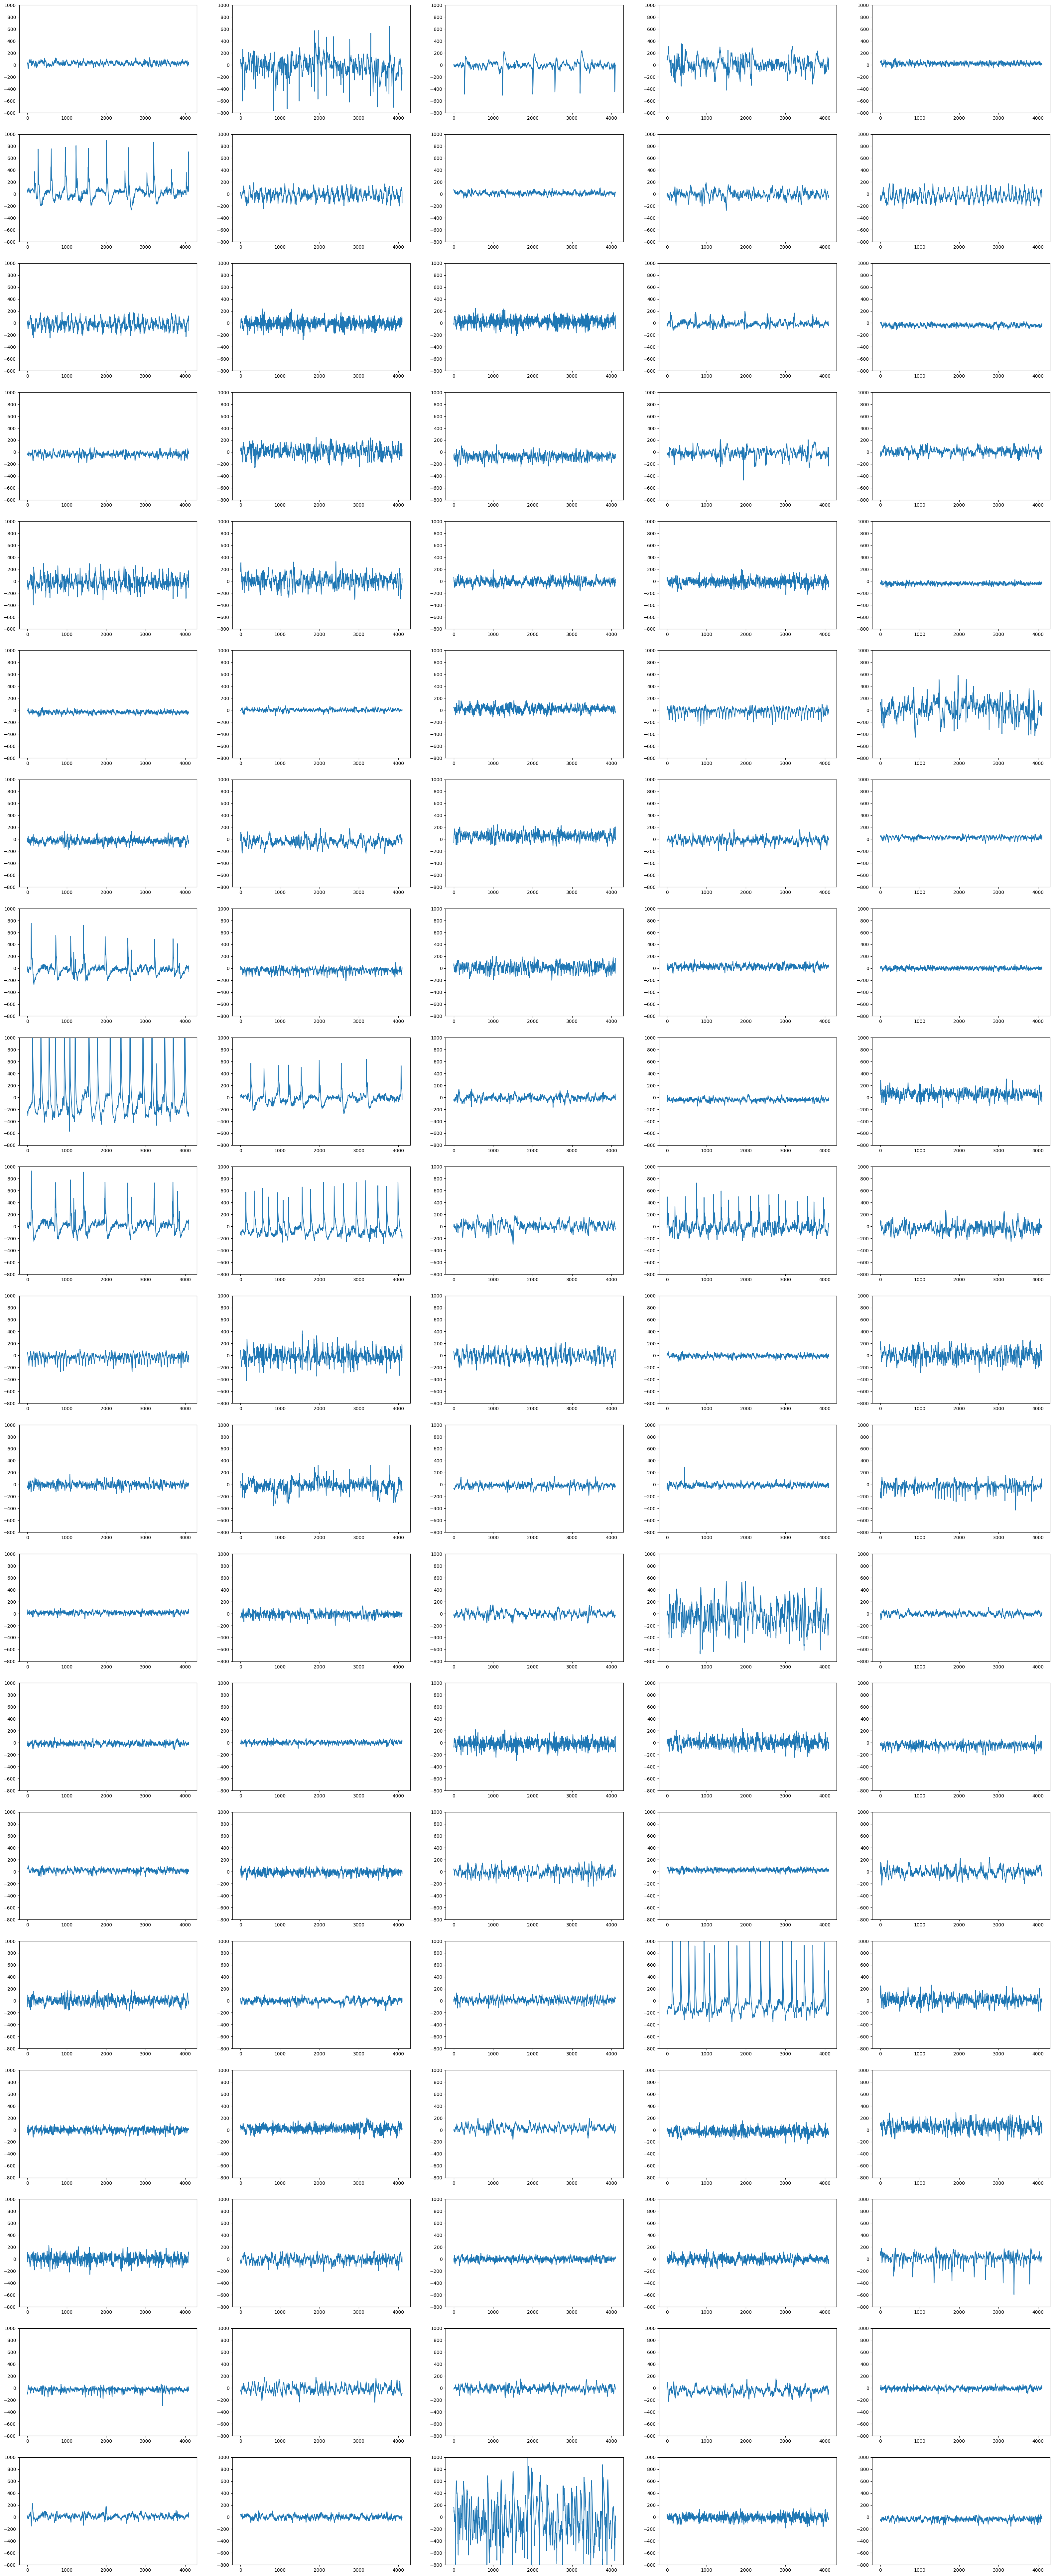

In [15]:
time_index = np.arange(len(data[0]))
run = 0

fig , axs = plt.subplots(20,5, figsize=(40,100))
for i in range(5):
    for j in range(20):
        axs[j][i].plot(time_index,data[run])
        axs[j][i].set_ylim(-800,1000)
        run += 1

plt.savefig('FTimeSeries1.png', dpi=72)

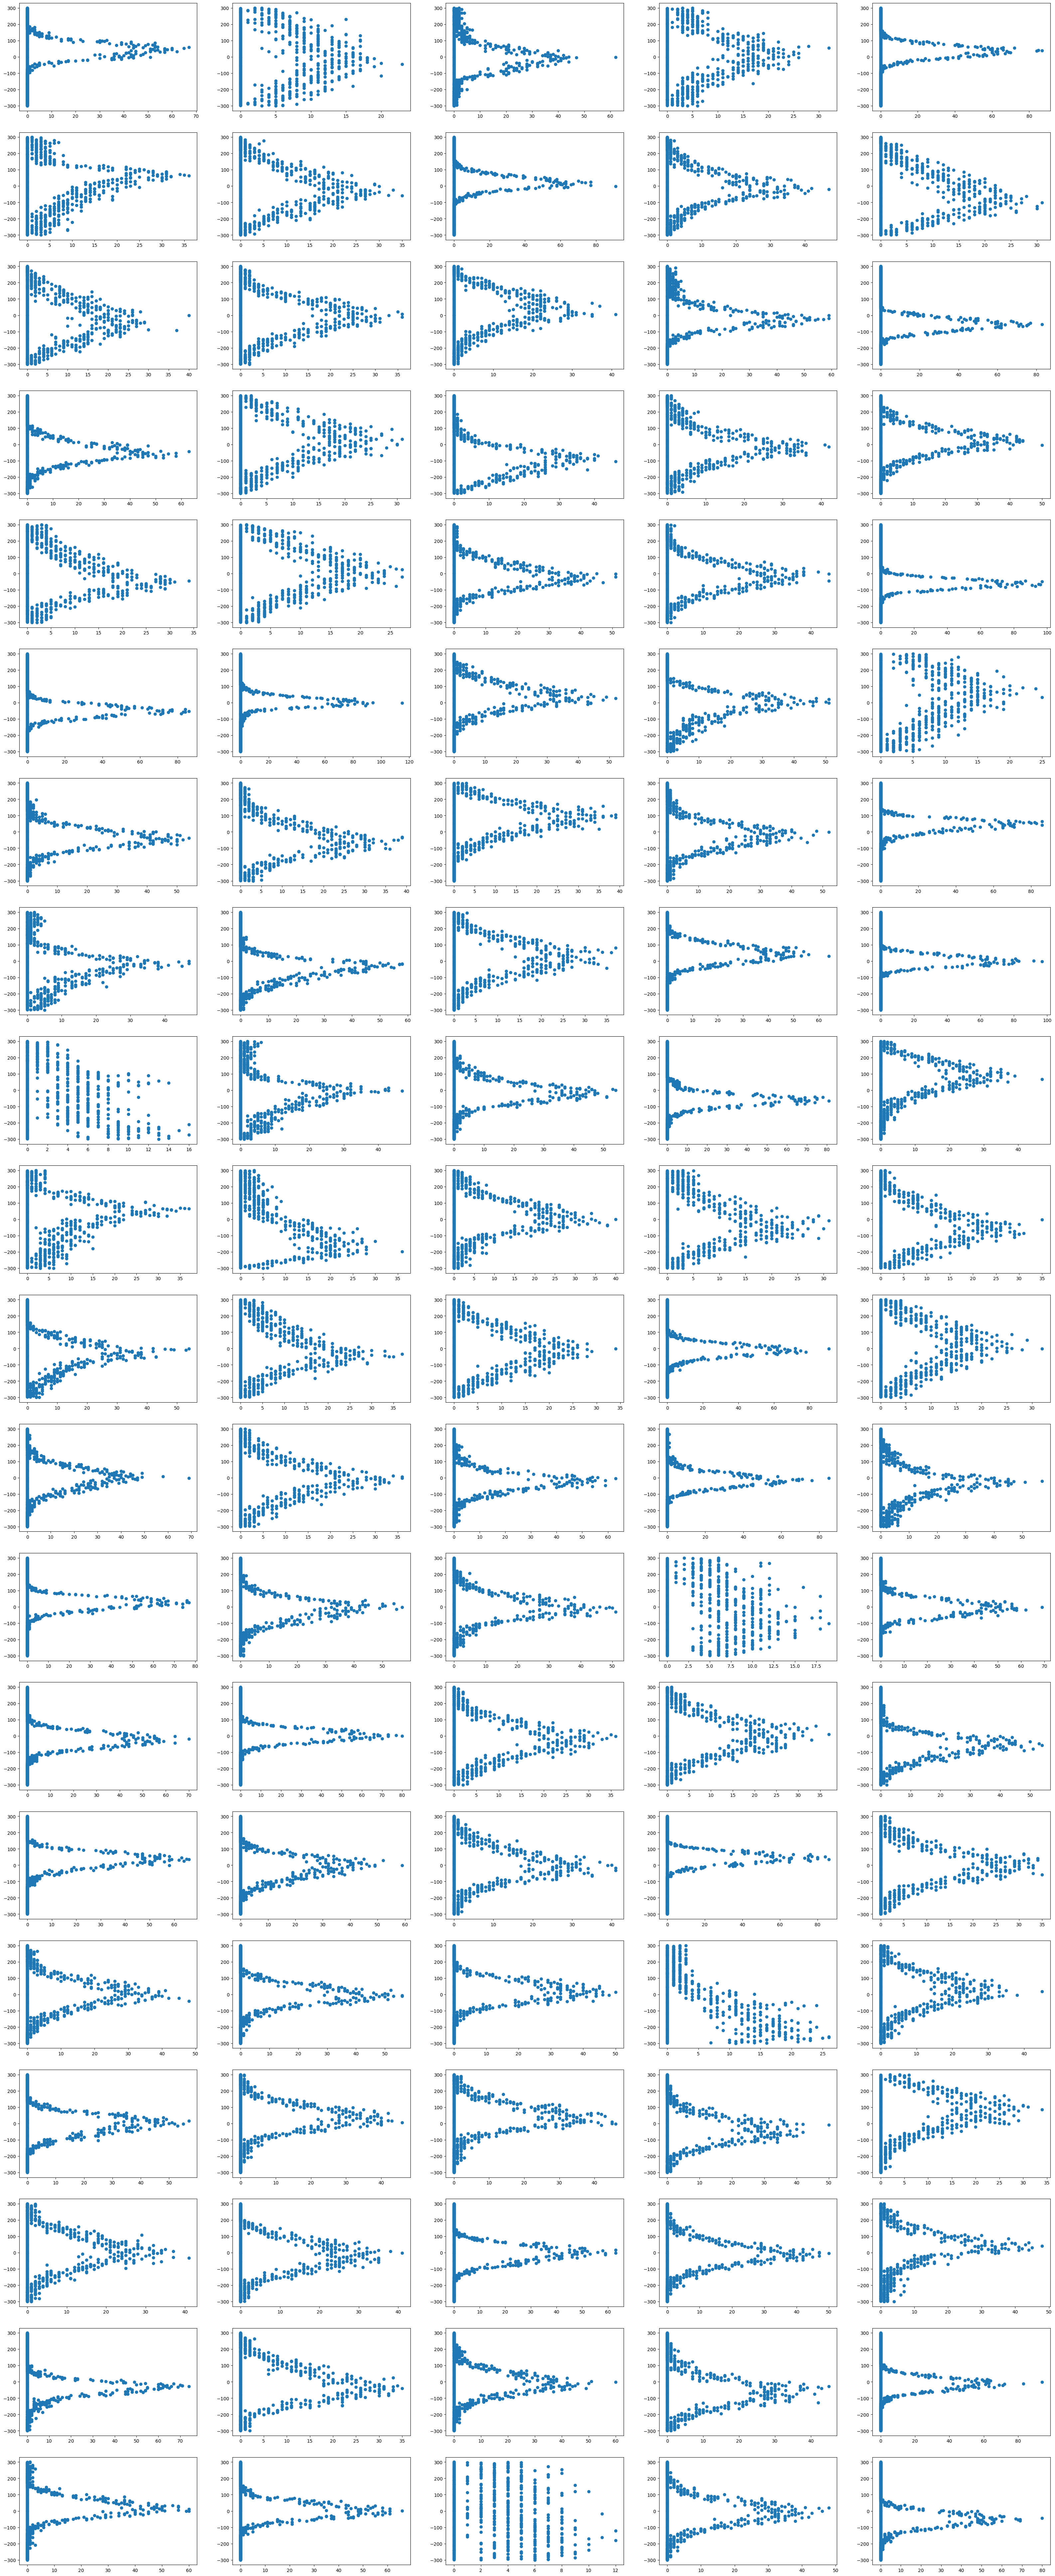

In [16]:
run = 0

fig , axs = plt.subplots(20,5, figsize=(40,100))
for i in range(5):
    for j in range(20):
        voltage = np.linspace(-300,300,601)
        counts, bin_edges = np.histogram(data[run], bins=601, range=(-200,200))
        axs[j][i].scatter(counts,voltage)
        #axs[j][i].set_xlim(0,100)
        run += 1

plt.savefig('F1_spikingpdf.png', dpi=72)

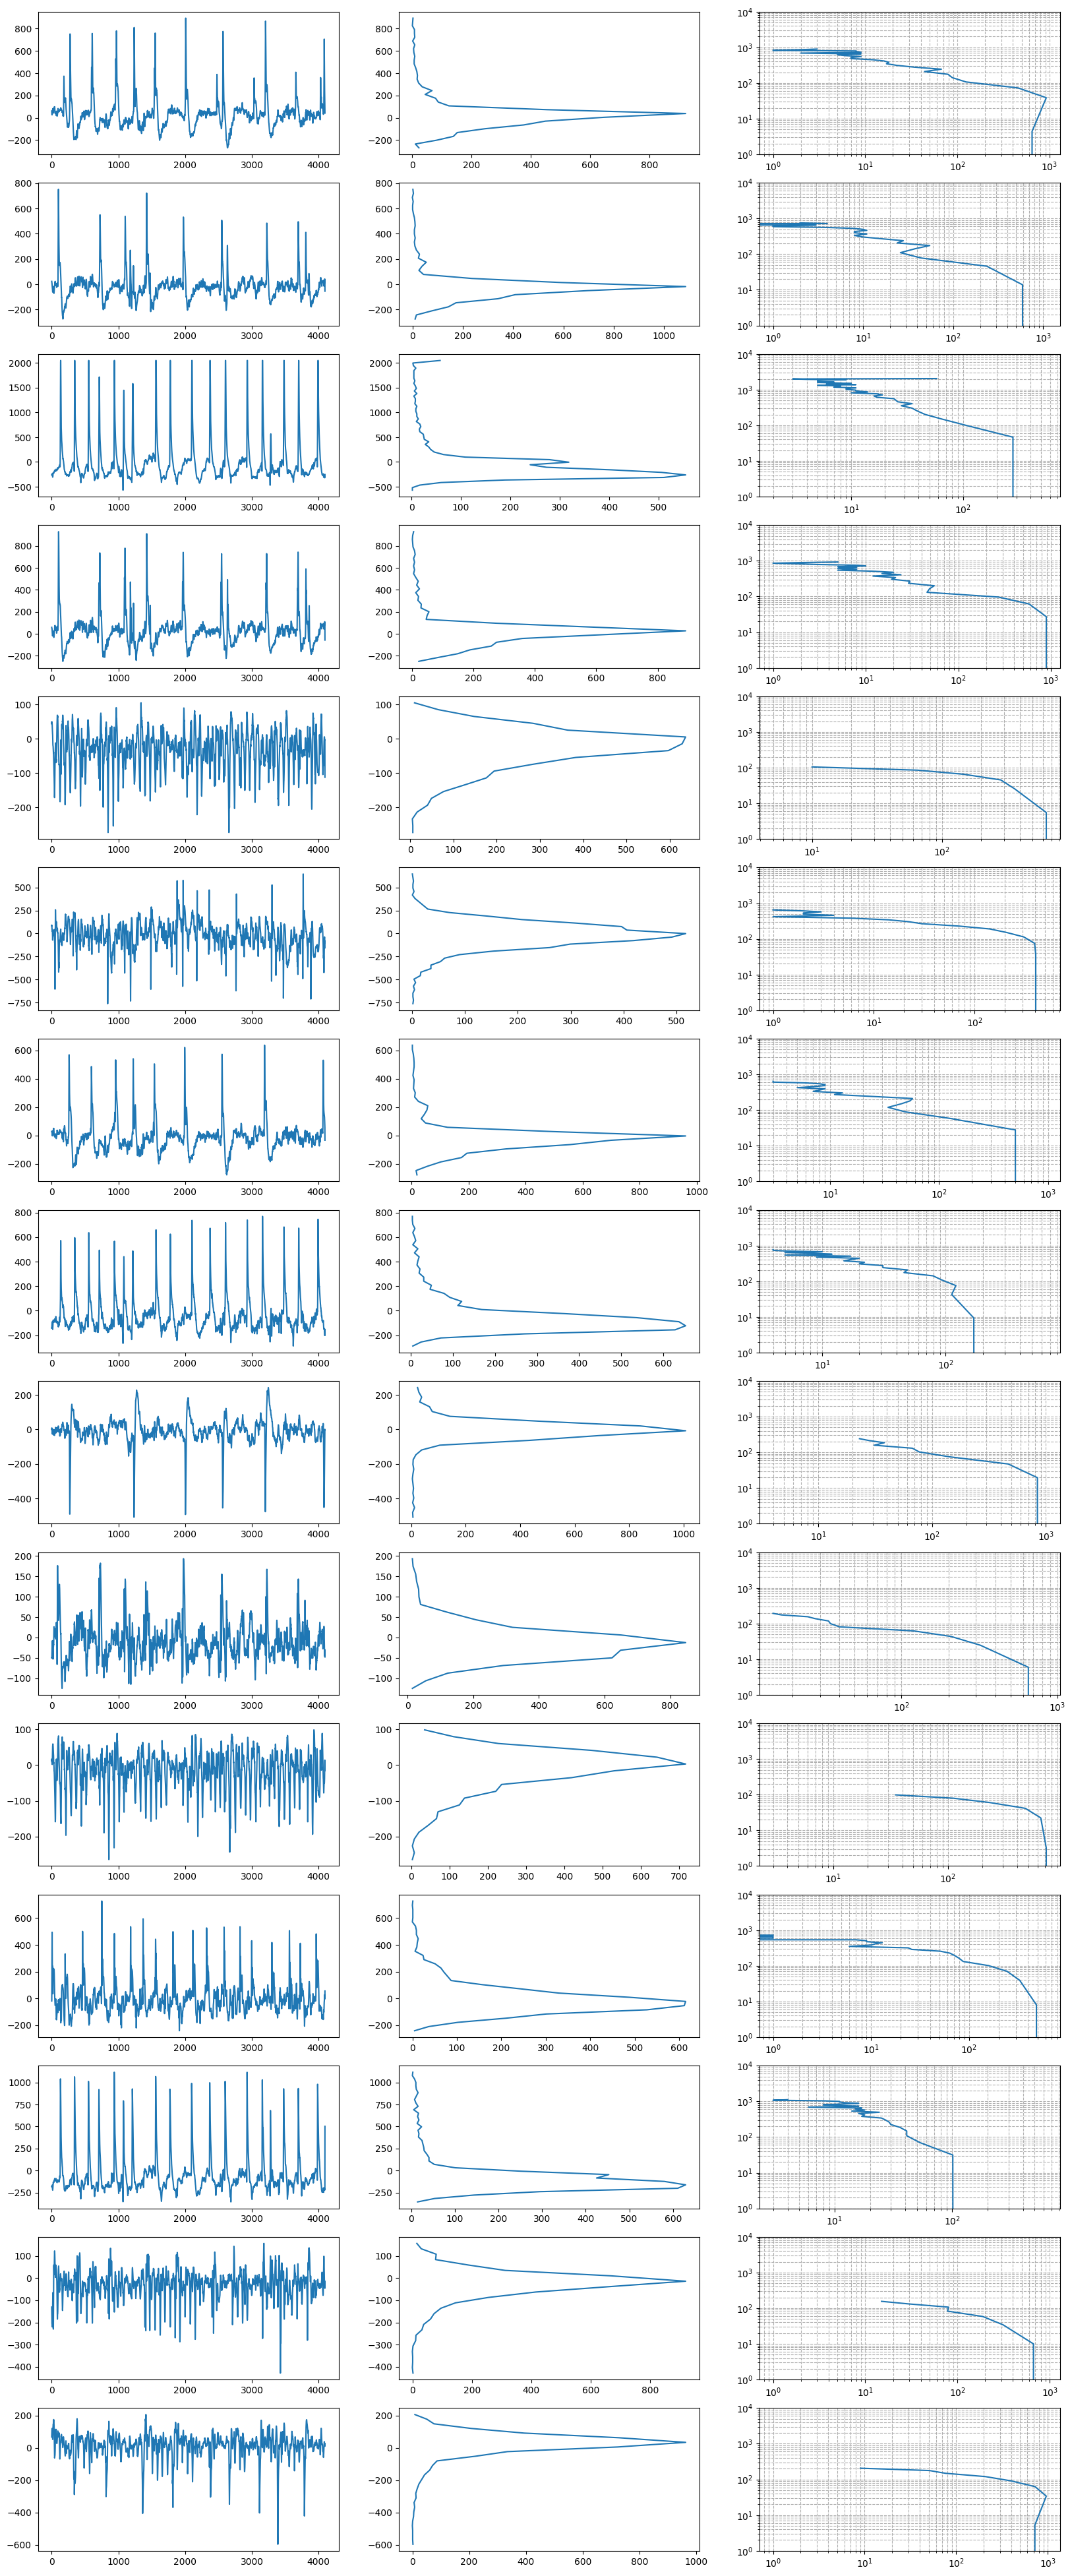

In [34]:
fig, axs = plt.subplots(15,3, figsize=(20,50))
runs = [1,7,8,9,10,20,28,29,40,62,65,69,75,91,97]
index = 0
for row in range(15):
    v_neuron = data[runs[index]]
    axs[row][0].plot(time_index,v_neuron)

    var_min = min(v_neuron)
    var_max = max(v_neuron)
    var_ran = int(np.ceil(np.sqrt(max(v_neuron)-min(v_neuron)+1)))

    voltage = np.linspace( var_min, var_max , var_ran )
    counts, bin_edges = np.histogram(data[runs[index]], bins=var_ran, range=( var_min ,var_max ))
    axs[row][1].plot(counts,voltage)
    axs[row][2].loglog(counts,voltage)
    #axs[row][2].set_aspect('equal', adjustable='box')
    axs[row][2].set_ylim(1,10000)
    axs[row][2].grid(True, which='both', ls="--")


    index += 1

plt.savefig('powerlaw_checking.png',dpi = 72)

